In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

2024-07-25 08:06:24.530868: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-25 08:06:24.530975: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-25 08:06:24.660126: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
# Define paths
train_dir = '/content/drive/MyDrive/Colab Notebooks/New/train/'
test_dir = '/content/drive/MyDrive/Colab Notebooks/New/test/'

# ImageDataGenerator for loading
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15)  # Using 20% of the data for validation

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)


Found 2040 images belonging to 2 classes.
Found 360 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
# Load the InceptionV3 model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])
from tensorflow.keras.optimizers import Adam
# Define the optimizer with a custom learning rate
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 7, 7, 1024)        3228864   
 onal)                                                           
                                                                 
 global_average_pooling2d_1  (None, 1024)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 3754690 (14.32 MB)
Trainable params: 525

In [ ]:

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10)


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/63 ━━━━━━━━━━━━━━━━━━━━ 13:30 13s/step - accuracy: 0.5312 - loss: 1.2820

I0000 00:00:1721894812.695911      94 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


61/63 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.8515 - loss: 0.4179

W0000 00:00:1721894831.156572      94 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 378ms/step - accuracy: 0.8559 - loss: 0.4051 - val_accuracy: 0.9858 - val_loss: 0.0391
Epoch 2/10
 1/63 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 1.0000 - loss: 0.0073

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 1.0000 - loss: 0.0073 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 3/10


W0000 00:00:1721894839.178695      94 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step - accuracy: 0.9982 - loss: 0.0071 - val_accuracy: 0.9545 - val_loss: 0.1018
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0221
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 0.9716 - val_loss: 0.0541
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - accuracy: 1.0000 - loss: 7.5518e-04 - val_accuracy: 0.9915 - val_loss: 0.0219
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 1.0000 - loss: 9.5961e-04 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 152ms/step - accuracy: 0.9997 - loss: 0.0022 - val_accuracy: 0.9602 - val_loss: 0.0747
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 1.0000 - loss: 1.7533e-04 - val_accura

In [ ]:
from tensorflow.keras.utils import plot_model
#plot_model(model,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

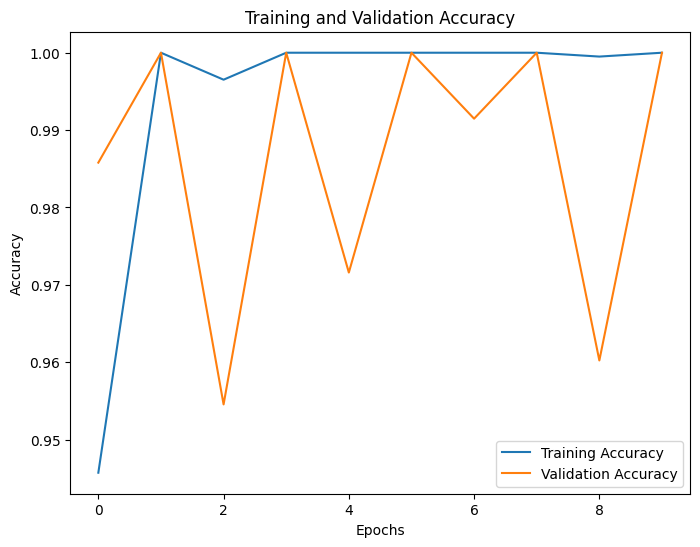

In [ ]:
import matplotlib.pyplot as plt
# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 311ms/step


W0000 00:00:1721894896.469082      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Accuracy: 0.9600
Precision: 1.0000
Recall: 0.9200
F1-score: 0.9583
Confusion Matrix
[[300   0]
 [ 24 276]]
Classification Report
              precision    recall  f1-score   support

  NoActivity       0.93      1.00      0.96       300
 YesActivity       1.00      0.92      0.96       300

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



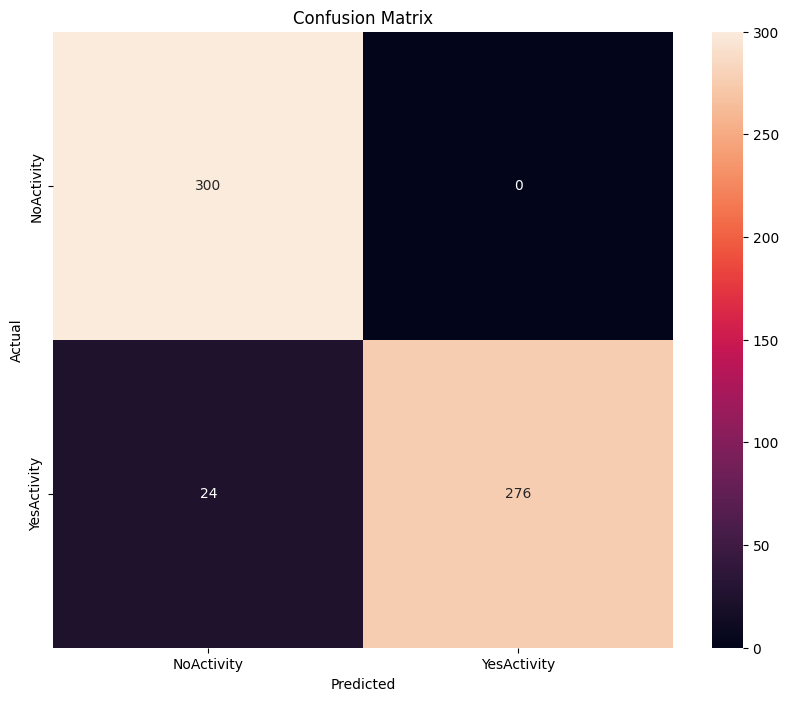

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
# Evaluate the model
test_generator.reset()
Y_pred = model.predict(test_generator, test_generator.samples // test_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)



accuracy = accuracy_score(test_generator.classes, y_pred)
precision = precision_score(test_generator.classes, y_pred)
recall = recall_score(test_generator.classes, y_pred)
f1 = f1_score(test_generator.classes, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

# Confusion matrix and classification report
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = list(test_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))


# Confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)
cm_plot_labels = list(test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=cm_plot_labels, yticklabels=cm_plot_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()